<a href="https://colab.research.google.com/github/thebabycode/ML/blob/main/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/home/johns/Desktop/ml lab/lab1/dataset/Melbourne_housing_FULL.csv')
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [ ]:
uniqueCounts = df.nunique();
print("Unique count across columns:")
print(uniqueCounts);

Unique count across columns:
Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64


In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df['Price'].fillna(value = df.Price.mean(), inplace = True)
df['Distance'].fillna(value = df.Distance.mean(), inplace = True)
df['Postcode'].fillna(value = df.Postcode.mean(), inplace = True)
df['Bedroom2'].fillna(value = df.Bedroom2.mean(), inplace = True)
df['Bathroom'].fillna(value = df.Bathroom.mean(), inplace = True)
df['Car'].fillna(value = df.Car.mean(), inplace = True)
df['Landsize'].fillna(value = df.Landsize.mean(), inplace = True)
df['Bedroom2'].fillna(value = df.Bedroom2.mean(), inplace = True)
df['YearBuilt'].fillna(value = df.YearBuilt.mean(), inplace = True)
df['Lattitude'].fillna(value = df.Lattitude.mean(), inplace = True)
df['Longtitude'].fillna(value = df.Longtitude.mean(), inplace = True)
df['Propertycount'].fillna(value = df.Propertycount.mean(), inplace = True)
df['BuildingArea'].fillna(value = df.BuildingArea.mean(), inplace = True)


In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df[['Price','Distance','Landsize','Propertycount']] = scaler.fit_transform(df[['Price','Distance','Landsize','Propertycount']])

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.000000,SS,Jellis,3/09/2016,-1.279322,3067.0,...,1.000000,1.000000,-0.169196,160.2564,1965.289885,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,-0.802624
1,Abbotsford,85 Turner St,2,h,0.757901,S,Biggin,3/12/2016,-1.279322,3067.0,...,1.000000,1.000000,-0.141696,160.2564,1965.289885,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,-0.802624
2,Abbotsford,25 Bloomburg St,2,h,-0.026755,S,Biggin,4/02/2016,-1.279322,3067.0,...,1.000000,0.000000,-0.158341,79.0000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,-0.802624
3,Abbotsford,18/659 Victoria St,3,u,0.000000,VB,Rounds,4/02/2016,-1.279322,3067.0,...,2.000000,1.000000,-0.214788,160.2564,1965.289885,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,-0.802624
4,Abbotsford,5 Charles St,3,h,0.731452,SP,Biggin,4/03/2017,-1.279322,3067.0,...,2.000000,0.000000,-0.166301,150.0000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,-0.802624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,0.757901,PI,Jas,24/02/2018,-0.719568,3013.0,...,1.000000,3.000000,-0.000217,160.2564,1965.289885,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,-0.232594
34853,Yarraville,29A Murray St,2,h,-0.285956,SP,Sweeney,24/02/2018,-0.719568,3013.0,...,2.000000,1.000000,-0.179327,104.0000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,-0.232594
34854,Yarraville,147A Severn St,2,t,-0.608634,S,Jas,24/02/2018,-0.719568,3013.0,...,1.000000,2.000000,-0.135183,120.0000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,-0.232594
34855,Yarraville,12/37 Stephen St,3,h,0.158389,SP,hockingstuart,24/02/2018,-0.719568,3013.0,...,1.624798,1.728845,0.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,-0.232594


# Multiple Linear Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Type']= label_encoder.fit_transform(df['Type'])


In [ ]:
y = df ['Type'].values
X = df.drop('Address', axis = 1)
X = X.drop('CouncilArea', axis = 1)
X = X.drop('Regionname', axis = 1)
X = X.drop('Suburb', axis = 1)
X = X.drop('SellerG', axis = 1)
X = X.drop('Method', axis = 1)
X = X.drop('Type', axis = 1)

X = X.drop('Date', axis = 1)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27885, 13), (6972, 13), (27885,), (6972,))

# Activation functions

**Relu**

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

In [ ]:
y_pred=reg.predict(X_test)
r2 = r2_score(y_pred, y_test)
print("The Score with ", r2)

The Score with  0.49415341759603637


**Sigmoid**

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, y_train)

In [ ]:
y_pred=reg.predict(X_test)
r2 = r2_score(y_pred, y_test)
print("The Score with ", r2)

The Score with  0.23237738958650322


**Tan**

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="tanh" ,random_state=1, max_iter=2000).fit(X_train, y_train)

In [ ]:
y_pred=reg.predict(X_test)
r2 = r2_score(y_pred, y_test)
print("The Score with ", r2)

The Score with  0.4384848775392729


**Weights**

In [ ]:
print (reg.coefs_)

[array([[ 1.58874497e-02,  6.64729659e-01, -9.13376497e-01,
        -3.47964638e-01, -5.18797023e-01, -3.41071834e-01,
        -6.45132798e-01,  6.66640860e-02,  8.85633956e-03,
        -5.01929257e-01, -1.64507578e-01,  3.58005855e-01,
        -1.77572775e-01,  5.62096902e-02, -7.30256592e-01,
         3.31715729e-02, -2.88212723e-01,  3.18218872e-02,
        -1.80978349e-01, -4.46645677e-01,  5.61167324e-01,
         6.62918230e-01, -8.13033556e-02,  3.24435683e-01,
         2.00180676e-01, -4.12642140e-02,  6.68280415e-01,
        -3.62949095e-01, -3.80593132e-01,  1.62243950e-01,
        -6.09443846e-01,  2.81039023e-01,  4.38359710e-01,
        -2.02435148e-01, -7.30819722e-02, -3.92359686e-01,
         2.40253437e-01,  1.49508137e-01, -1.29960210e-01,
        -1.41336298e-01,  6.44764280e-01,  1.06022948e-01,
        -5.33995193e-02,  5.78990173e-01, -1.35498000e-01,
        -1.03780499e-01,  6.96659018e-01, -3.03594537e-01,
        -7.35732782e-01, -2.68359908e-01, -5.65456756e-

/home/joseph/Desktop/ml lab/lab1/mlenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

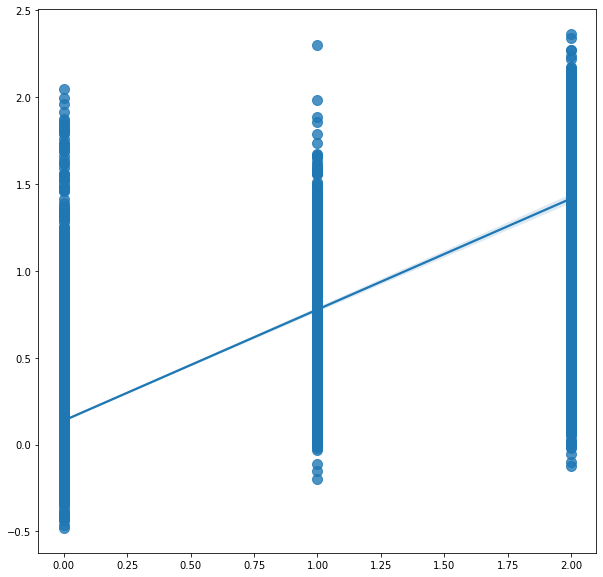

In [ ]:
    import seaborn as sns
    plt.figure(figsize=(10,10))
    sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

# MLP Classification

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

/home/joseph/Desktop/ml lab/lab1/mlenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8386402753872634


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="logistic",random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.8138267355134825


/home/joseph/Desktop/ml lab/lab1/mlenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="tanh",random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.8387837062535858


/home/joseph/Desktop/ml lab/lab1/mlenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Weights**

In [ ]:
print (clf.coefs_)


[array([[-0.11327144,  0.19635074, -0.26897009, ...,  0.4683826 ,
         0.04603493,  0.17640013],
       [-0.21116111, -0.02031706, -0.43810812, ..., -0.67380375,
        -0.13426589,  0.25233062],
       [-0.1578604 , -0.27688267,  0.06560584, ..., -0.2479355 ,
         0.1198995 , -0.03423477],
       ...,
       [ 0.06136316, -0.28082456,  0.11051186, ..., -0.24214426,
         0.07272388, -0.20476435],
       [-0.35512409,  0.35274349, -0.32601076, ...,  0.25324607,
        -0.23015196, -0.27417069],
       [-0.05407817,  0.07057696, -0.07738499, ...,  0.0396171 ,
        -0.00949858,  0.04779681]]), array([[ 0.08622224,  0.04381629, -0.11527121, ..., -0.15715432,
        -0.22254606,  0.03797664],
       [-0.51639619,  0.61015099, -0.58610766, ...,  0.16245421,
         0.46680455,  0.12390163],
       [ 0.3028195 , -0.21842608,  0.15422159, ..., -0.05742469,
        -0.1193362 , -0.02488655],
       ...,
       [-0.36296384,  0.56851888, -0.40508413, ...,  0.07773416,
        

/home/joseph/Desktop/ml lab/lab1/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


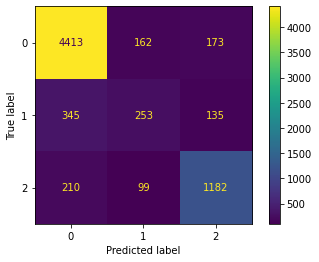

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig=plot_confusion_matrix(clf, X_test, y_test)
fig.figure_.suptitle("")
plt.show()

**Inference**
Since high accuracy score is shown in MLPClassifier we can infer that it is a classification problem